<a href="https://colab.research.google.com/github/aozoramoew/CS4410/blob/main/Assignment_1_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read the given Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/uncleandata.csv')

#1. How many row are there?

In [ ]:
df.shape

(15099, 11)

I used the shape attribute of the dataframe to see its shape => There are 15099 rows as shown in the output.

# 2. How many columns are there? What are they?

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


As shown in the shape attribute output, there are 11 columns. I use head() function to show the first 5 rows of the dataset and see that those 11 columns are:
<div>-satisfaction_level
<div>-last_evaluation
<div>-number_project
<div>-average_montly_hours
<div>-time_spend_company
<div>-work_accident
<div>-left
<div>-promotion_last_5years
<div>-is_smoker
<div>-department
<div>-salary

# 3. How many features? What are they?
There are 10 features which are 9/10 columns as shown before (except the target ('left') column):
<div>-satisfaction_level
<div>-last_evaluation
<div>-number_project
<div>-average_montly_hours
<div>-time_spend_company
<div>-work_accident
<div>-promotion_last_5years
<div>-is_smoker
<div>-department
<div>-salary

#4.How many duplicates if any?

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows (all columns):")
duplicate_rows.shape

Duplicate rows (all columns):


(2840, 11)

I create a new dataframe to store duplicate row in the given dataset. The shape of the new created dataframe shows that there is 2840 duplicate rows in the dataset.

#5. Remove duplicates if there are any.

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(12259, 11)

# 6. Print the distributions of each features. What do you see ?

In [ ]:
# Print the distribution of numerical features
display(df.describe())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,12259.000000,12259.000000,12259.000000,11891.000000,12109.000000,12259.000000,12259.000000
mean,0.628149,0.716666,3.804389,200.511732,3.380048,0.153928,0.016886
std,0.241893,0.168627,1.170172,48.843440,1.356414,0.360894,0.128848
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


-The 50th percentile and the mean distribution tell me the typical value of a category.  
-The standard deviation (`std`), minimum (`min`), maximum (`max`), and quartiles (`25th` and `75th` percentiles) show how spread out the data is. This can help identify outliers or unusual ranges.  
-The min and max values, along with the quartiles, can help me spot potential outliers that are significantly different from the rest of the data.  
-The count row in `df.describe()` indicates the number of non-null values for each numerical column. Comparing this to the total number of rows tells me how many missing values are present in each category.

In [ ]:
# Print the distribution of categorical features
for col in ['work_accident', 'left', 'promotion_last_5years', 'is_smoker', 'department', 'salary']:
    display(df[col].value_counts())

,count
work_accident,
0,10372
1,1887


,count
left,
no,10144
yes,2115


,count
promotion_last_5years,
0,12052
1,207


,count
is_smoker,
no,180
yes,55


,count
department,
sales,3321
technical,2282
support,1861
IT,998
product_mng,704
RandD,698
marketing,690
accounting,629
hr,611


,count
salary,
low,5872
medium,5360
high,1027


-`promotion_last_5years` and `work_accident` are heavily skewed towards 0, meaning most employees did not have a recent promotion or a work accident.  
-`is_smoker` also has a large number of missing values, and among the non-missing values, there are significantly more 'no' responses than 'yes'.  
###These two distributions can also be seen in the graphs below
-The department distribution shows that `sales`, `technical`, and `support` are the largest departments.  
-The `salary` distribution shows that `low` and `medium` salaries are much more common than `high` salaries.

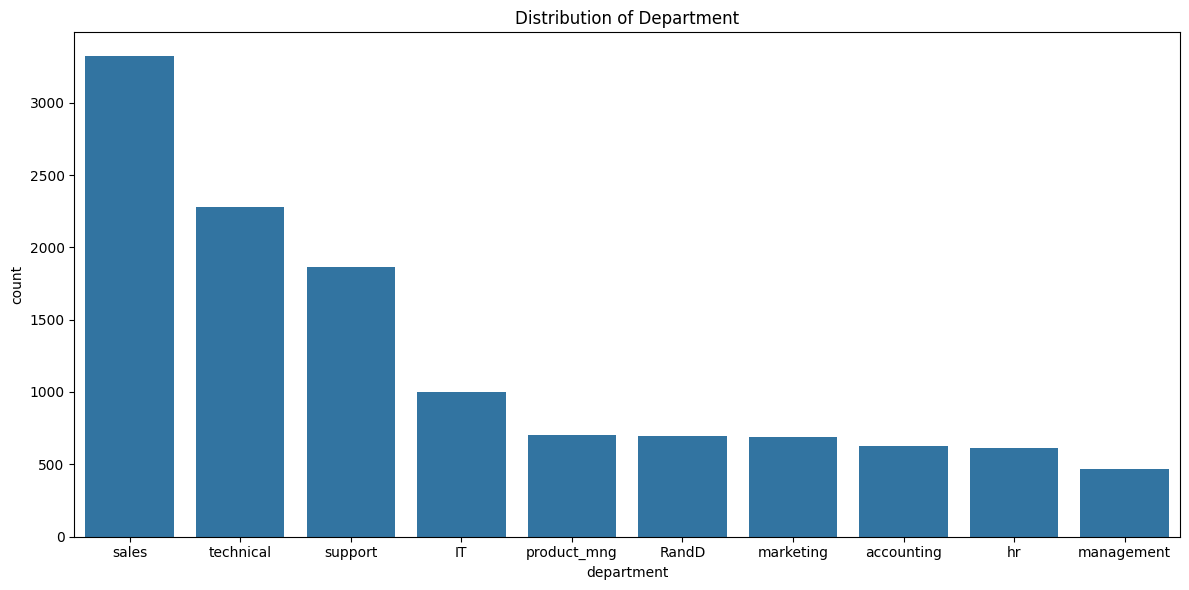

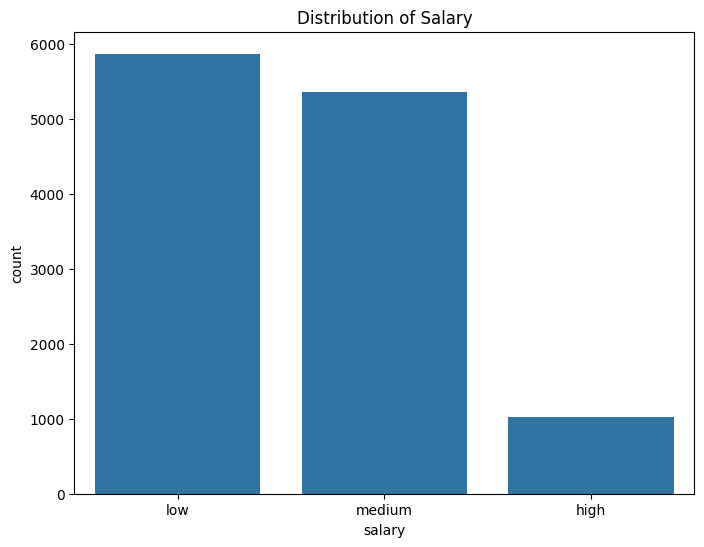

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'department' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='department', order=df['department'].value_counts().index)
plt.title('Distribution of Department')
plt.tight_layout()
plt.show()

# Plot the distribution of the 'salary' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='salary', order=df['salary'].value_counts().index)
plt.title('Distribution of Salary')
plt.show()

#7. How many missing values are there ? What features have missing values ?

In [ ]:
display(df.isnull().sum())

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,368
time_spend_company,150
work_accident,0
left,0
promotion_last_5years,0
is_smoker,12024
department,0


There are 3 features having missing values: `average_montly_hours`(368), `time_spend_company`(150) and `is_smoker`(12024)

#8. Drop the features with largest number of missing values and fill up the rest of the features with missing values with mean. Can you explain why did we drop the feature with largest portion of missing values in this case ?

In [ ]:
# Drop the column with the largest number of missing values
missing_counts = df.isnull().sum()
col_to_drop = missing_counts.idxmax()
df.drop(columns=[col_to_drop], inplace = True)

# Fill missing values in the remaining columns with the mean
for col in df.columns:
    if df[col].isnull().any():
      # If the value in the col is numeric, it calculates the mean of that col
        if pd.api.types.is_numeric_dtype(df[col]):
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)

We dropped the feature with the largest number of missing values (`is_smoker`) because it had a very high percentage of missing data (over 80%). Imputing such a large proportion of missing values, even with the mean or another method, could introduce significant bias and potentially distort the distribution of the feature and its relationship with other variables.  
In this case, dropping the column is a reasonable approach to avoid introducing noise and maintain the integrity of the dataset for analysis and modeling.

# 9. Show that there are no missing values in the data at this point.

In [ ]:
print("\nMissing values after dropping and filling:")
df.isnull().sum()


Missing values after dropping and filling:


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


#10. Feature "left" has values 'yes' and 'no'. Convert those values into integer values, 1 and 0.

In [ ]:
df['left'] = df['left'].map({'yes': 1, 'no': 0})

In [ ]:
display(df.head(5))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.000000,3.000000,0,1,0,sales,low
1,0.80,0.86,5,262.000000,6.000000,0,1,0,sales,medium
2,0.11,0.88,7,272.000000,4.000000,0,1,0,sales,medium
3,0.72,0.87,5,223.000000,5.000000,0,1,0,sales,low
4,0.37,0.52,2,200.511732,3.380048,0,1,0,sales,low


#11. Save the resulting data into a file.

In [ ]:
df.to_csv('output.csv', index=False)

#12. What else do you observe in in this data set.

#13. Divide the data into training set(80%) and test set(20%) and show the number of data points in each by following

1. Uniform sampling

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('left', axis=1)
y = df['left']

# Split the data into training and testing sets using uniform sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Show the number of data points in each set
print(f"Number of data points in training set: {X_train.shape[0]}")
print(f"Number of data points in test set: {X_test.shape[0]}")

Number of data points in training set: 9807
Number of data points in test set: 2452


2. Stratified sampling based on the ratio of "yes" and "no" values of feature "left"

In [ ]:
# Separate features (X) and target (y)
X = df.drop('left', axis=1)
y = df['left']

# Split the data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Show the number of data points in each set
print(f"Number of data points in training set: {X_train.shape[0]}")
print(f"Number of data points in test set: {X_test.shape[0]}")

# Show the distribution of 'left' in training and test sets
print("\nDistribution of 'left' in training set:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of 'left' in test set:")
print(y_test.value_counts(normalize=True))

Number of data points in training set: 9807
Number of data points in test set: 2452

Distribution of 'left' in training set:
left
0    0.82747
1    0.17253
Name: proportion, dtype: float64

Distribution of 'left' in test set:
left
0    0.827488
1    0.172512
Name: proportion, dtype: float64


3. How would you do the test set and training set sampling and why?  
I will also use Stratified sampling since:  
-In the distribution of the `left`
feature, the number of employees who left (`yes` or `1`) is significantly smaller than those who stayed (`no` or `0`). This is an imbalanced dataset.  
-This sampling method ensures that the proportion of the target variable (`left`) is the same in both the training and test sets. This is crucial for building a reliable model, as it prevents the model from being biased towards the majority class.  
-If we used uniform sampling, there's a chance that the test set might have a very different proportion of employees who left compared to the training set, leading to an inaccurate evaluation of the model's performance.
   
**For example:** The train data may have a higher proportion of employees who left compared to the test data, which cause the model to predit which could cause the model to predict that more employees will leave than is actually the case in the test set.  
  
-And by maintaining the class distribution, stratified sampling provides a more representative test set, allowing for a more accurate evaluation of how well the model generalizes to unseen data.
    
***In summary***, stratified sampling is preferred here to handle the class imbalance and ensure that both the training and test sets reflect the true distribution of employees who left or stayed.